In [98]:
#import statements
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix,f1_score

def str_to_numeric(data1):
 label_mapping = {}
 char_cols = data1.dtypes.pipe(lambda x: x[x == 'object']).index
 for c in char_cols:
    data1[c], label_mapping[c] = pd.factorize(data1[c])
 return data1   

data = pd.read_csv("C:/Users/Kiruthika Velusamy/Documents/Machine Learning Assignment/cleaned_and_imputed_data.csv");
data= data.drop(['id'], axis=1)
data =data.drop(data.columns[0],axis=1)
#splitting the data
original_train, original_test = train_test_split(data, train_size=0.65)
train = str_to_numeric(original_train)
test = str_to_numeric(original_test)
#train data
train_X = train[train.columns.difference(['y'])]
train_Y = train[['y']]
# #transforming the train_X by standard scalar
X=StandardScaler().fit_transform(train_X)
#increasing the eps distance between two samples , min sample=5
db=DBSCAN(eps=4.10,min_samples=5).fit(X)
labels=db.labels_
print(labels)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)
pd.Series(labels).value_counts()

C:\Users\Kiruthika Velusamy\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\Kiruthika Velusamy\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


[0 0 0 ... 0 0 0]
Estimated number of clusters: 3


 0    22907
 1      900
 2       75
-1       17
dtype: int64

Estimated number of clusters: 2
 0    22944
 1      952
-1        3
dtype: int64
inlier 952 outlier 3 total train X 23899


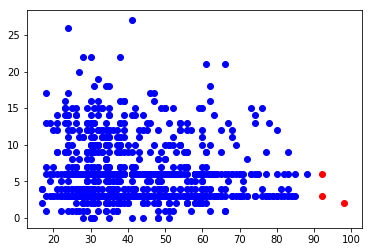

In [88]:

X=StandardScaler().fit_transform(train_X[['age','pdays']])
db=DBSCAN(eps=0.3,min_samples=10).fit(X)
labels=db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)
print(pd.Series(labels).value_counts())
train_X['pred'] = labels
outlier=labels[labels==-1]
inlier=labels[labels==1]
print('inlier',len(inlier),'outlier',len(outlier),'total train X', len(train_X[['age','pdays']]))
axes = plt.subplot()
axes.scatter(train_X[train_X['pred']==1]['age'],train_X[train_X['pred']==1]['pdays'],c='blue')
# axes.scatter(train_X[train_X['pred']==0]['age'],train_X[train_X['pred']==0]['pdays'],c='green')
axes.scatter(train_X[train_X['pred']==-1]['age'],train_X[train_X['pred']==-1]['pdays'],c='red')
